# 1) A report on a Financial Derivative

### Data import via yfinance


In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl

In [3]:
initial_data = yf.download("GOOG ^VIX", start="2020-10-05", end="2021-10-05")

[*********************100%***********************]  2 of 2 completed


In [4]:
initial_data.head()

Adj Close                   Close                    High  \
                   GOOG       ^VIX         GOOG       ^VIX         GOOG   
Date                                                                      
2020-10-05  1486.020020  27.959999  1486.020020  27.959999  1488.209961   
2020-10-06  1453.439941  29.480000  1453.439941  29.480000  1486.760010   
2020-10-07  1460.290039  28.059999  1460.290039  28.059999  1468.959961   
2020-10-08  1485.930054  26.360001  1485.930054  26.360001  1490.000000   
2020-10-09  1515.219971  25.000000  1515.219971  25.000000  1516.520020   

                               Low                    Open             \
                 ^VIX         GOOG       ^VIX         GOOG       ^VIX   
Date                                                                    
2020-10-05  29.690001  1464.270020  27.270000  1466.209961  29.520000   
2020-10-06  30.000000  1448.589966  26.010000  1475.579956  28.049999   
2020-10-07  29.760000  1436.000000  27.940001  1464.290039  29.260000   
2020-10-08  27.990000  1465.089966  24.879999  1465.089966  27.650000   
2020-10-09  26.219999  1489.449951  24.030001  1494.699951  26.200001   

             Volume       
               GOOG ^VIX  
Date                      
2020-10-05  1113300    0  
2020-10-06  1245400    0  
2020-10-07  1746200    0  
2020-10-08  1187800    0  
2020-10-09  1435300    0

In [5]:
data =  initial_data['Adj Close']
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2020-10-05 to 2021-10-04
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GOOG    252 non-null    float64
 1   ^VIX    252 non-null    float64
dtypes: float64(2)
memory usage: 5.9 KB


In [6]:
data.head()

,GOOG,^VIX
Date,,
2020-10-05,1486.020020,27.959999
2020-10-06,1453.439941,29.480000
2020-10-07,1460.290039,28.059999
2020-10-08,1485.930054,26.360001
2020-10-09,1515.219971,25.000000


In [7]:
data.tail()

,GOOG,^VIX
Date,,
2021-09-28,2723.679932,23.250000
2021-09-29,2690.419922,22.559999
2021-09-30,2665.310059,23.139999
2021-10-01,2729.250000,21.100000
2021-10-04,2675.300049,22.959999


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

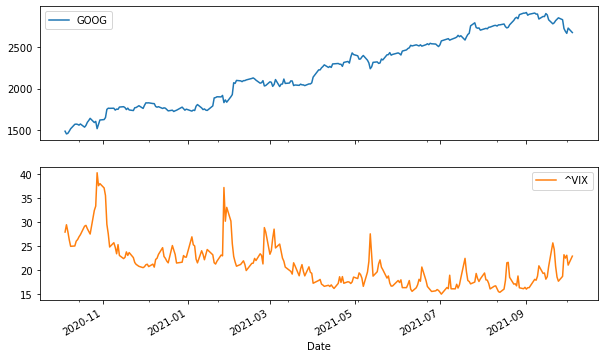

In [8]:
data.plot(figsize=(10, 6), subplots=True)

## Summary statistics for GOOG

Different summary statistics for the data set is seen below to get a feeling for what it is all about where; info( ) gives some meta information about all the DataFrame object and describe( ) provides useful standard statistics per column.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2020-10-05 to 2021-10-04
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GOOG    252 non-null    float64
 1   ^VIX    252 non-null    float64
dtypes: float64(2)
memory usage: 5.9 KB


In [10]:
data.describe().round(2)

,GOOG,^VIX
count,252.00,252.00
mean,2214.77,21.23
std,419.86,4.59
min,1453.44,15.07
25%,1786.47,17.68
50%,2232.32,20.78
75%,2583.93,23.20
max,2916.84,40.28


## Movement of the stock over the time period 

Absolute differences, percentage changes, and logarithmic (log) returns are all possibilities for calculating changes in a time series over time.

In [11]:
data.diff().head()

,GOOG,^VIX
Date,,
2020-10-05,NaN,NaN
2020-10-06,-32.580078,1.520000
2020-10-07,6.850098,-1.420000
2020-10-08,25.640015,-1.699999
2020-10-09,29.289917,-1.360001


In [12]:
data.diff().describe().round(2)

,GOOG,^VIX
count,251.00,251.00
mean,4.74,-0.02
std,32.32,2.02
min,-106.34,-7.00
25%,-11.83,-0.96
50%,5.50,-0.22
75%,20.74,0.81
max,142.56,14.19


Absolute changes are not desirable from a statistical standpoint because they are dependent on the magnitude of the time series data. As a result, percentage changes are often recommended. 

In a financial setting, the following code calculates percentage changes or percentage returns (also known as simple returns) and visualises their mean values per column.

In [13]:
data.pct_change().round(3).head()

,GOOG,^VIX
Date,,
2020-10-05,NaN,NaN
2020-10-06,-0.022,0.054
2020-10-07,0.005,-0.048
2020-10-08,0.018,-0.061
2020-10-09,0.020,-0.052


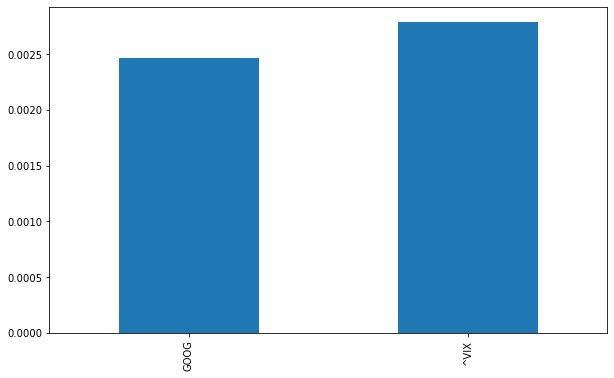

In [14]:
data.pct_change().mean().plot(kind='bar', figsize=(10, 6));

The percentage change between two index values are being calculated. The above bar plot diagram visualizes the mean values of the results. 

Log returns can be used as an alternative to percentage returns. 
They are easier to handle in particular situations and, as a result, are frequently favoured in a financial situation.

In [15]:
LR = np.log(data / data.shift(1))
LR.head().round(3)

,GOOG,^VIX
Date,,
2020-10-05,NaN,NaN
2020-10-06,-0.022,0.053
2020-10-07,0.005,-0.049
2020-10-08,0.017,-0.062
2020-10-09,0.020,-0.053


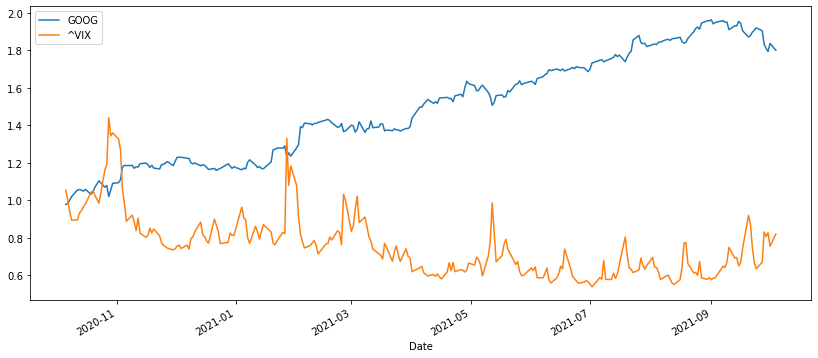

In [16]:
LR.cumsum().apply(np.exp).plot(figsize=(14, 6));

The cumulative log returns for a single financial time series are depicted in the graph above. The graphs of this type result in some form of normalization.

## Resampling

Resampling generates a unique sampling distribution on the basis of the actual data. A time series with daily observations is resampled to one with weekly time intervals and monthly time intervals.

In [17]:
data.resample('1w', label='right').last().head()

,GOOG,^VIX
Date,,
2020-10-11,1515.219971,25.000000
2020-10-18,1573.010010,27.410000
2020-10-25,1641.000000,27.549999
2020-11-01,1621.010010,38.020000
2020-11-08,1761.750000,24.860001


In [18]:
data.resample('1m', label='right').last().head()

,GOOG,^VIX
Date,,
2020-10-31,1621.010010,38.020000
2020-11-30,1760.739990,20.570000
2020-12-31,1751.880005,22.750000
2021-01-31,1835.739990,33.090000
2021-02-28,2036.859985,27.950001


<AxesSubplot:xlabel='Date'>

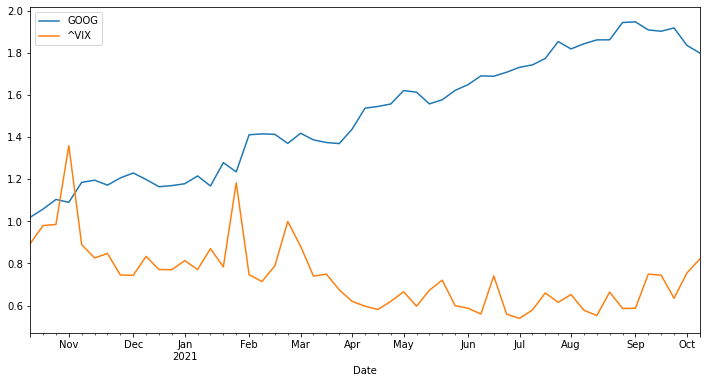

In [19]:
LR.cumsum().apply(np.exp). resample('1w', label='right').last().plot(figsize=(12, 6))

<AxesSubplot:xlabel='Date'>

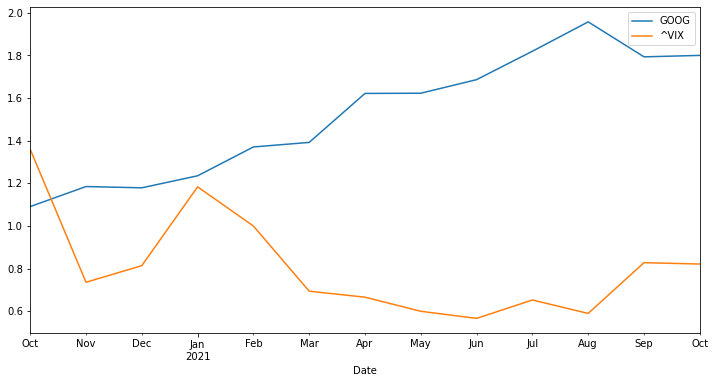

In [20]:
LR.cumsum().apply(np.exp). resample('1m', label='right').last().plot(figsize=(12, 6))

The above two graphs show the resampled cumulative log returns over time (weekly)and (monthly)

## Financial Indicators

Working with rolling statistics, also known as financial indicators or financial studies, has long been a financial tradition. 
Financial chartists and technical traders, for example, rely on rolling statistics.

In [21]:
sym = 'GOOG'
GOOG_data = pd.DataFrame(data[sym]).dropna()
GOOG_data.tail()

,GOOG
Date,
2021-09-28,2723.679932
2021-09-29,2690.419922
2021-09-30,2665.310059
2021-10-01,2729.250000
2021-10-04,2675.300049


In [22]:
window = 10
GOOG_data['min'] = data[sym].rolling(window=window).min()
GOOG_data['mean'] = data[sym].rolling(window=window).mean()
GOOG_data['std'] = data[sym].rolling(window=window).std()
GOOG_data['median'] = data[sym].rolling(window=window).median()
GOOG_data['max'] = data[sym].rolling(window=window).max()
GOOG_data['ewma'] = data[sym].ewm(halflife=0.5, min_periods=window).mean()
GOOG_data.dropna().head()

,GOOG,min,mean,std,median,max,ewma
Date,,,,,,,
2020-10-16,1573.010010,1453.439941,1524.195007,49.325723,1537.174988,1573.010010,1570.084467
2020-10-19,1534.609985,1453.439941,1529.054004,47.507059,1546.869995,1573.010010,1543.478599
2020-10-20,1555.930054,1460.290039,1539.303015,39.814430,1557.530029,1573.010010,1552.817191
2020-10-21,1593.310059,1485.930054,1552.605017,31.921740,1563.604980,1593.310059,1583.186842
2020-10-22,1615.329956,1515.219971,1565.545007,27.859590,1568.614990,1615.329956,1607.294178


The figure below shows the rolling statistics for minimum, mean and maximum values.

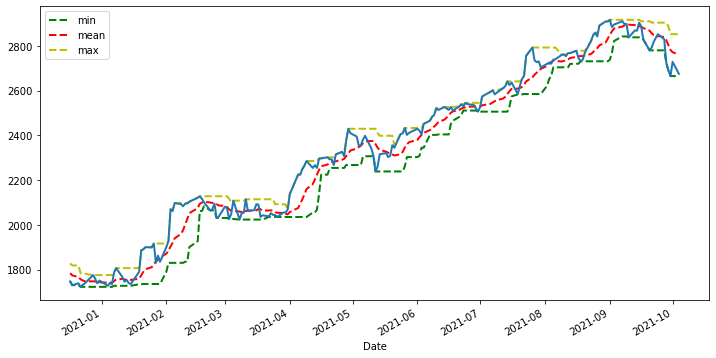

In [23]:
ax = GOOG_data[['min', 'mean', 'max']].iloc[-200:].plot(figsize=(12, 6), style=['g--', 'r--', 'y--'], lw=2)
data[sym].iloc[-200:].plot(ax=ax, lw=2.0);

In [24]:
GOOG_data['SMA1'] = data[sym].rolling(window=20).mean()
GOOG_data['SMA2'] = data[sym].rolling(window=60).mean()
GOOG_data[[sym, 'SMA1', 'SMA2']].tail()

,GOOG,SMA1,SMA2
Date,,,
2021-09-28,2723.679932,2857.195496,2766.939498
2021-09-29,2690.419922,2846.254492,2768.522831
2021-09-30,2665.310059,2833.677991,2769.585498
2021-10-01,2729.250000,2825.921497,2772.013997
2021-10-04,2675.300049,2814.911499,2773.410832


SMA1 calculates the values for the shorter-term SMA.


SMA2 calculates the values for the longer-term SMA.

<AxesSubplot:xlabel='Date'>

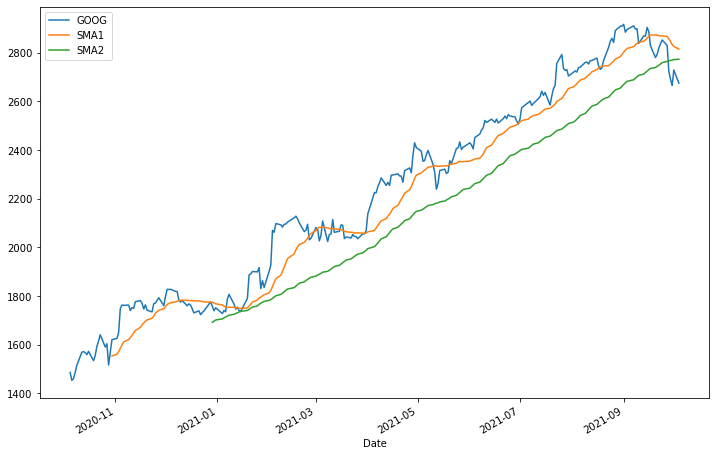

In [25]:
GOOG_data[[sym, 'SMA1', 'SMA2']].plot(figsize=(12, 8))

Google stock price and two simple moving averages can be seen in the graph above.

SMAs are merely a means to an end in this context. They are used to generate positions for a trading strategy. The figure below depicts a long position with a value of 1 and a short position with a value of -1. A crossover of the two lines representing the SMA time series causes the position to change:

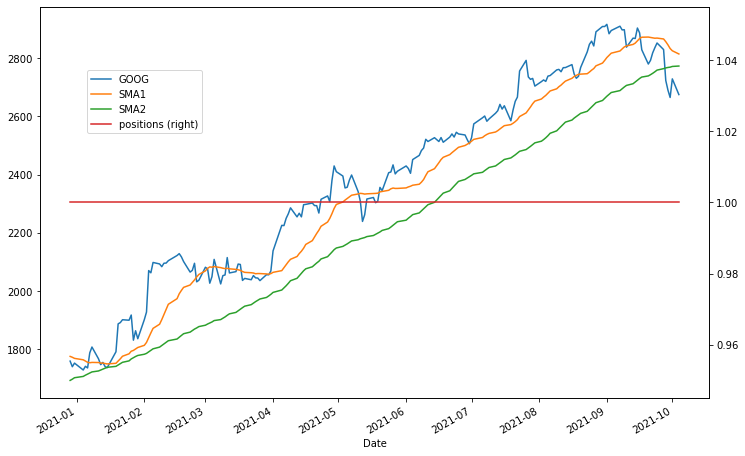

In [26]:
GOOG_data.dropna(inplace=True)
GOOG_data['positions'] = np.where(GOOG_data['SMA1'] > GOOG_data['SMA2'],1,-1)
ax = GOOG_data[[sym, 'SMA1', 'SMA2', 'positions']].plot(figsize=(12, 8),secondary_y='positions')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85))

The above graph visualizes Apple stock price, two simple moving averages and positions.

## Correlation Analysis

Whenever the GOOG rises, the VIX falls in general, and vice versa. This is about correlation, not causation. This section demonstrates how to generate some statistical evidence to support the stylized fact that the GOOG and the VIX are (highly) negatively correlated.

In [27]:
Corr_data = data[['GOOG', '^VIX']].dropna()
Corr_data.tail()

,GOOG,^VIX
Date,,
2021-09-28,2723.679932,23.250000
2021-09-29,2690.419922,22.559999
2021-09-30,2665.310059,23.139999
2021-10-01,2729.250000,21.100000
2021-10-04,2675.300049,22.959999


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

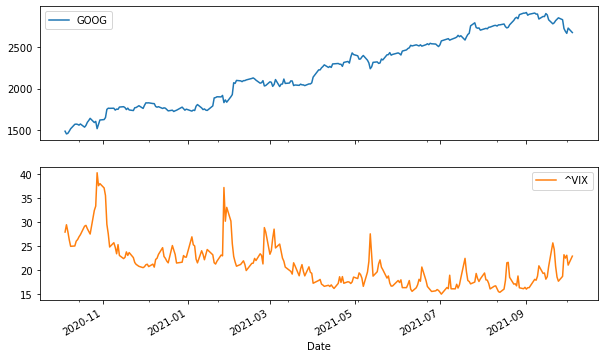

In [28]:
Corr_data.plot(subplots=True, figsize=(10, 6))

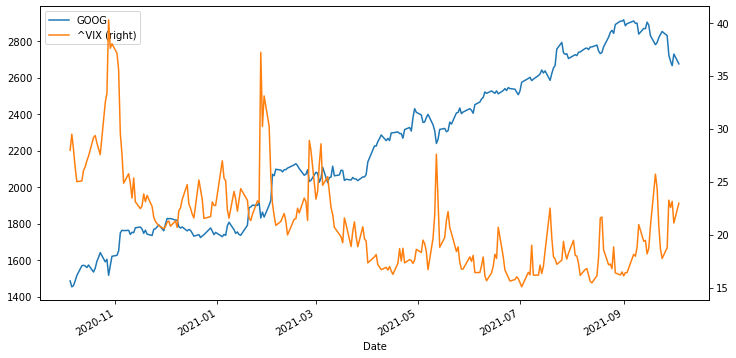

In [29]:
Corr_data.loc['2020-10-05':].plot(secondary_y='^VIX', figsize=(12, 6));

## Logarithmic Returns

In [30]:
sprets = np.log(Corr_data / Corr_data.shift(1))
sprets.head()

,GOOG,^VIX
Date,,
2020-10-05,NaN,NaN
2020-10-06,-0.022168,0.052937
2020-10-07,0.004702,-0.049367
2020-10-08,0.017406,-0.062497
2020-10-09,0.019520,-0.052972


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

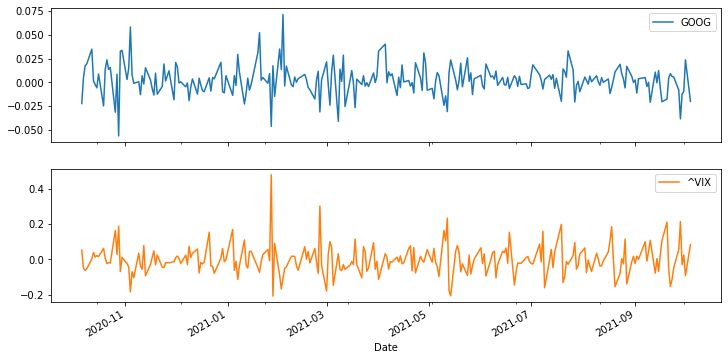

In [31]:
sprets.dropna(inplace=True)
sprets.plot(subplots=True, figsize=(12, 6))

Before proceeding with any further analysis, the log returns are calculated first. The graph above depicts the high variability of log returns over time. A so-called "volatility cluster" is visible for both indices. Periods of high volatility in the stock index, in general, are accompanied by the same hypothesis in the volatility index.

array([[<AxesSubplot:xlabel='GOOG', ylabel='GOOG'>,
        <AxesSubplot:xlabel='^VIX', ylabel='GOOG'>],
       [<AxesSubplot:xlabel='GOOG', ylabel='^VIX'>,
        <AxesSubplot:xlabel='^VIX', ylabel='^VIX'>]], dtype=object)

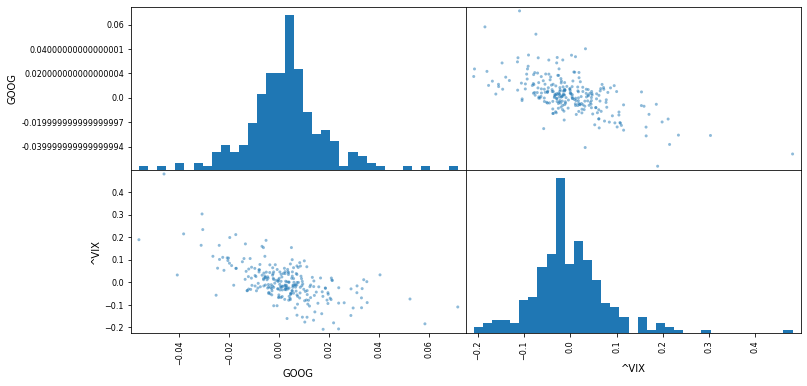

In [32]:
pd.plotting.scatter_matrix(sprets, alpha=0.5, diagonal='hist', hist_kwds={'bins': 35}, figsize=(12, 6))

The above graph portrays Log returns of the GOOG and VIX as a scatter matrix.

## Ordinary Least-Squares Regression Analysis

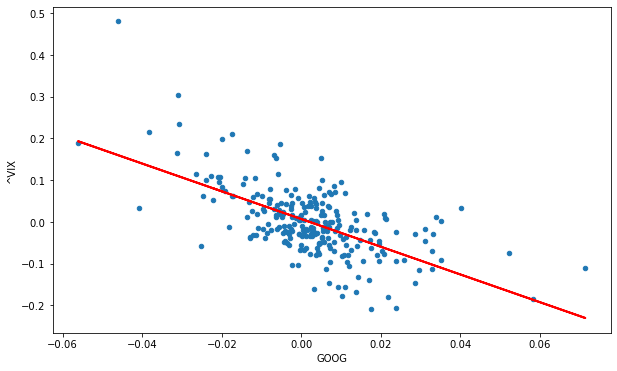

In [33]:
reg = np.polyfit(sprets['GOOG'], sprets['^VIX'], deg=1)
ax = sprets.plot(kind='scatter', x='GOOG', y='^VIX', figsize=(10, 6))
ax.plot(sprets['GOOG'], np.polyval(reg, sprets['GOOG']), 'r', lw=2);

The scatter plot of the log returns and the linear regression line across the clouds of dots is shown in this diagram. The slope is clearly negative, confirming the stylised fact that the two indexes have a negative association.

## Correlation

The graph below shows that while the correlation varies over time, it is always negative when given the parameterisation. This backs up the stylized notion that the AAPL and VIX indices are strongly negatively correlated.

In [34]:
sprets.corr()

,GOOG,^VIX
GOOG,1.000000,-0.621548
^VIX,-0.621548,1.000000


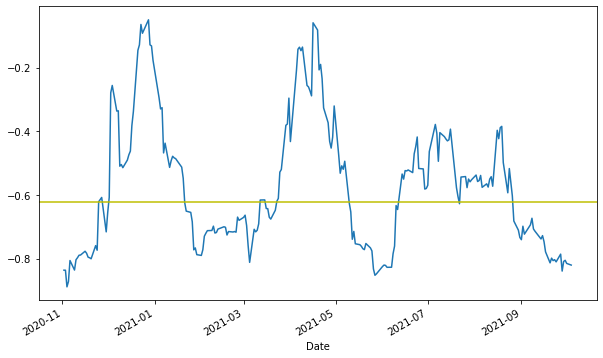

In [35]:
ax = sprets['GOOG'].rolling(window=20).corr(sprets['^VIX']).plot(figsize=(10, 6)) 
ax.axhline(sprets.corr().iloc[0, 1], c='y');

## Calculating the Volatility

In [36]:
GOOG= data['GOOG']
VIX= data ['^VIX']

In [37]:
lr = np.log(GOOG / GOOG.shift(1))

In [38]:
vol=np.sqrt(252)*lr.std()
print('The annualised volatility is',round(vol*100,2),'%')

The annualised volatility is 24.75 %


In [39]:
VIX=VIX[-1]

In [40]:
print('The market volatility is',round(VIX,2),'%')

The market volatility is 22.96 %


<AxesSubplot:xlabel='Date'>

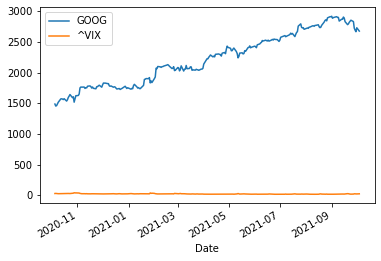

In [41]:
data.plot()

# 2) Methodology

### Calculating the spot price 

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si
import yfinance as yf
import os

In [43]:
data = yf.download("GOOG", start="2020-10-05", end="2021-10-05")

[*********************100%***********************]  1 of 1 completed


In [44]:
S = data['Adj Close'][-1]
print('The spot price is $', round(S,2))

The spot price is $ 2675.3


# The Data Input

In [45]:
S0 = 2675.3             # spot stock price
K = 2500                # strike price
T = 1.0                 # Time to maturity 
r = 0.0134              # risk free rate 
sigma = 0.2475          # diffusion coefficient or volatility
N = 3                   # number of periods or number of time steps  
payoff = "call"         # payoff 

## Binomial Price Tree

In [46]:
dT = float(T) / N                             # Delta t
u = np.exp(sigma * np.sqrt(dT))               # up factor
d = 1.0 / u                                   # down factor                                

In [47]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [48]:
S

array([[2675.3       , 3086.24677036, 3560.31814285, 4107.21054456],
       [   0.        , 2319.07252483, 2675.3       , 3086.24677036],
       [   0.        ,    0.        , 2010.27823998, 2319.07252483],
       [   0.        ,    0.        ,    0.        , 1742.60121617]])

In [49]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p.round(4)

0.4799

In [50]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
q.round(4)

0.5201

In [51]:
p+q

1.0

In [52]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[   0.        ,    0.        ,    0.        , 1607.21054456],
       [   0.        ,    0.        ,    0.        ,  586.24677036],
       [   0.        ,    0.        ,    0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        ,    0.        ]])

### European Option (call)

In [53]:
# for European Option
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[ 383.20421773,  656.97800271, 1071.45990772, 1607.21054456],
       [   0.        ,  133.84108468,  280.11409039,  586.24677036],
       [   0.        ,    0.        ,    0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        ,    0.        ]])

In [54]:
print('European ' + payoff,'= $' , str( V[0,0].round(2)))


European call = $ 383.2


## Black-Scholes Model

Non-Dividend Paying Options

In [55]:
def euro_option_bs(S, K, T, r, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value = - S * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [56]:
x = euro_option_bs(2675.3, 2500, 1.0, 0.0134, 0.2475, 'call')
print('$',x.round(2))

$ 370.92


In [57]:
S = np.linspace(2000,3000,101)
cp = np.zeros((len(S),1))
for i in range(len(S)):
    cp[i] = euro_option_bs(S[i], 2500, 1.0, 0.0134, 0.2475, 'call')

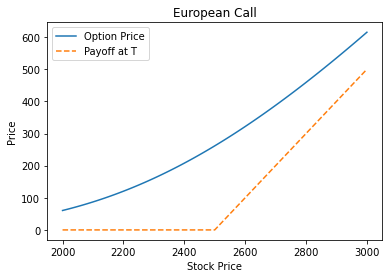

In [58]:
fig = plt.figure()
plt.plot(S, cp, '-')
plt.plot(S, np.maximum(S-2500,0), '--')
plt.xlabel('Stock Price')
plt.ylabel('Price')
plt.title('European Call')
plt.legend(['Option Price','Payoff at T'])

## Option Trading

In [59]:
GOOG = yf.Ticker('GOOG')
opt = GOOG.option_chain('2021-12-31')
opt.calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,GOOG211231C02090000,2021-12-01 14:35:39,2090.0,785.87,760.0,776.50,785.87,NaN,NaN,1,0.678989,True,REGULAR,USD
1,GOOG211231C02100000,2021-12-02 20:02:57,2100.0,786.62,750.2,766.70,786.62,NaN,NaN,4,0.673526,True,REGULAR,USD
2,GOOG211231C02130000,2021-12-01 17:35:47,2130.0,775.73,721.0,737.50,0.00,0.0,6.0,73,0.659671,True,REGULAR,USD
3,GOOG211231C02140000,2021-11-29 17:29:17,2140.0,781.40,711.0,727.20,0.00,0.0,36.0,70,0.648624,True,REGULAR,USD
4,GOOG211231C02150000,2021-12-02 17:03:24,2150.0,726.78,701.4,718.00,0.00,0.0,17.0,70,0.648655,True,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,GOOG211231C04050000,2021-11-30 14:43:52,4050.0,0.20,0.0,2.35,0.00,0.0,10.0,11,0.539311,False,REGULAR,USD
134,GOOG211231C04150000,2021-11-24 14:58:40,4150.0,0.90,0.0,2.10,0.00,0.0,NaN,28,0.563969,False,REGULAR,USD
135,GOOG211231C04200000,2021-11-24 14:42:49,4200.0,0.85,0.0,2.05,0.00,0.0,NaN,0,0.577885,False,REGULAR,USD
136,GOOG211231C04250000,2021-11-24 14:42:46,4250.0,0.85,0.0,2.00,0.00,0.0,NaN,32,0.591557,False,REGULAR,USD


In [60]:
data = yf.download("GOOG", start="2020-11-13", end="2021-11-13")

[*********************100%***********************]  1 of 1 completed


In [61]:
data['Adj Close']

Date
2020-11-13    1777.020020
2020-11-16    1781.380005
2020-11-17    1770.150024
2020-11-18    1746.780029
2020-11-19    1763.920044
                 ...     
2021-11-08    2987.030029
2021-11-09    2984.969971
2021-11-10    2932.520020
2021-11-11    2934.959961
2021-11-12    2992.909912
Name: Adj Close, Length: 252, dtype: float64

In [62]:
S = 2675.3
K = 2500
T = 1
r = 0.0134
q = 0
log_return = np.log(data['Adj Close'] / data['Adj Close'].shift(1))
vol = np.sqrt(252) * log_return.std() 
print('σ =',vol.round(4))

σ = 0.2321


# Greeks 

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si

### Option Value

In [64]:
def euro_option_bsm(S, K, T, r, q, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #q: continuous dividend yield
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value =  - S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [65]:
EOB = euro_option_bsm(2675.3, 2500, 1.0, 0.0134, 0, 0.2475, 'call')
print('EOB = $',EOB.round(5))

EOB = $ 370.91784


In [66]:
S = np.linspace(2000,3000,101)
Call = np.zeros((len(S),1))
Put = np.zeros((len(S),1))
for i in range(len(S)):
    Call [i] = euro_option_bsm(S[i], 2500, 1.0, 0.0134, 0, 0.2475, 'call')

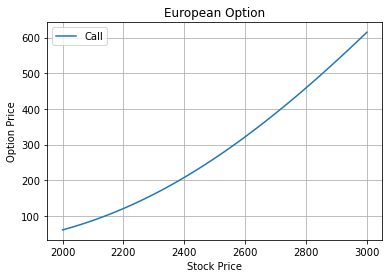

In [67]:
fig = plt.figure()
plt.plot(S, Call, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Option Price')
plt.title('European Option')
plt.legend(['Call'])

## Delta

In [68]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)
    
    return delta

In [69]:
DC = delta(2675.3, 2500, 1.0, 0.0134, 0, 0.2475, 'call')
print('Δ =$',DC.round(6))

Δ =$ 0.674262


In [70]:
DC1 = delta(2675.3, 2500, 1, 0.0134, 0, 0.2475, 'call') * 0.01
print('If the Δ increases by 1%, then the value of the option increases by $',DC1.round(9))

If the Δ increases by 1%, then the value of the option increases by $ 0.006742621


In [71]:
S = np.linspace(1000,4000,404)
Delta_Call = np.zeros((len(S),1))
Delta_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Delta_Call [i] = delta(S[i], 2500, 1.0, 0.0134, 0, 0.2475, 'call')

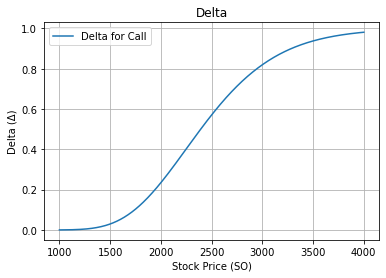

In [72]:
fig = plt.figure()
plt.plot(S, Delta_Call, '-')
plt.grid()
plt.xlabel('Stock Price (SO)')
plt.ylabel('Delta (\u0394)')
plt.title('Delta')
plt.legend(['Delta for Call'])

In [73]:
S = np.linspace(1000,4000,404)
T = np.linspace(0.5, 2, 404)
Delta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Delta[i,j] = delta(S[j], 2500, T[i], 0.0134, 0, 0.2475, 'call')

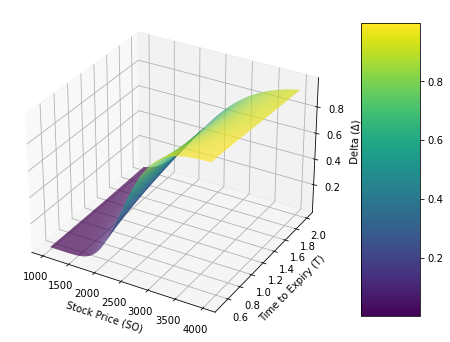

In [74]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=plt.cm.viridis, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price (SO)')
ax.set_ylabel('Time to Expiry (T)')
ax.set_zlabel('Delta (Δ)')
fig.colorbar(surf, shrink=0.9, aspect=5);

## Gamma

In [75]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [76]:
GC = gamma(2675.3, 2500, 1.0, 0.0134, 0, 0.2475, 'call')
print ('\u03B3 = $',GC.round(8))

γ = $ 0.00054407


In [77]:
S = np.linspace(1000,4000,404)
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i], 2500, 1.0, 0.0134, 0, 0.2475, 'call')

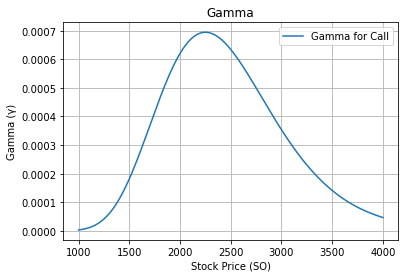

In [78]:
fig = plt.figure()
plt.plot(S, Gamma, '-')
plt.grid()
plt.xlabel('Stock Price (SO)')
plt.ylabel('Gamma (\u03B3)')
plt.title('Gamma')
plt.legend(['Gamma for Call'])

In [79]:
S = np.linspace(1000,4000,404)
T = np.linspace(0.5, 2, 404)
Gamma = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Gamma[i,j] = gamma(S[j], 2500, T[i], 0.0134, 0, 0.2475, 'call')

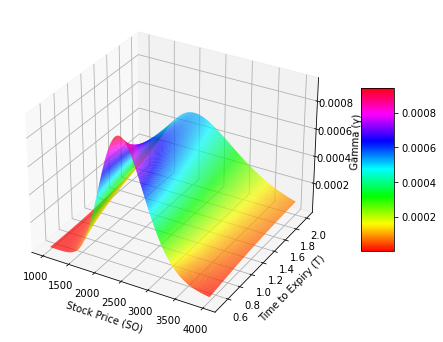

In [80]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Gamma, rstride=2, cstride=2, cmap=plt.cm.hsv, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price (SO)')
ax.set_ylabel('Time to Expiry (T)')
ax.set_zlabel('Gamma (\u03B3)')
fig.colorbar(surf, shrink=0.5, aspect=5);

## Theta

In [81]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [82]:
TC = theta(2675.3, 2500, 1.0, 0.0134, 0, 0.2475, 'call')
print('\u03B8 =',TC.round(3))

θ = 138.468


In [83]:
TC1 = theta(2675.3, 2500, 1, 0.0134, 0, 0.2475, 'call') * 0.01
print('If the \u03B8 increases by 1%, then the value of the option increases by $',TC1.round(4))

If the θ increases by 1%, then the value of the option increases by $ 1.3847


In [84]:
T = np.linspace(0.5,2,404)
Theta_Call = np.zeros((len(T),1))
Theta_Put = np.zeros((len(T),1))
for i in range(len(T)):
    Theta_Call [i] = theta(2675.3, 2500, T[i], 0.0134, 0, 0.2475, 'call')

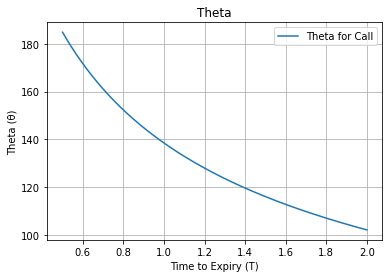

In [85]:
fig = plt.figure()
plt.plot(T, Theta_Call, '-')
plt.grid()
plt.xlabel('Time to Expiry (T)')
plt.ylabel('Theta (\u03B8)')
plt.title('Theta')
plt.legend(['Theta for Call'])

In [86]:
TC = theta(2675.3, 2500, 1, 0.0134, 0, 0.2475, 'call')
print('\u03B8 value for 6 months = $',TC.round(3))

θ value for 6 months = $ 138.468


In [87]:
TC = theta(2675.3, 2500, 1, 0.0134, 0, 0.2475, 'call')*0.5
print('Price for 6 months decreases to $',TC.round(3))

Price for 6 months decreases to $ 69.234


In [88]:
TC1 = theta(2675.3, 2500, 1, 0.0134, 0, 0.2475, 'call')*1.5
print('Price for 1.5 years increases to $',TC1.round(3))

Price for 1.5 years increases to $ 207.702


In [89]:
TC1 - TC 
print('The change in price for call option between 6 months and 1.5 years = $',(TC1 - TC).round(3))

The change in price for call option between 6 months and 1.5 years = $ 138.468


In [90]:
S = np.linspace(1000, 4000, 404)
T = np.linspace(0.5, 2, 404)
Theta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Theta[i,j] = theta(S[j], 2500, T[i], 0.0134, 0, 0.2475, 'call')

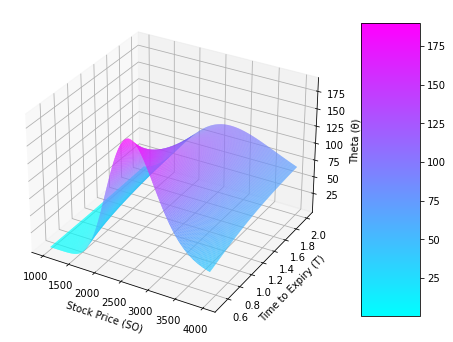

In [91]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Theta, rstride=2, cstride=2, cmap=plt.cm.cool, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price (SO)')
ax.set_ylabel('Time to Expiry (T)')
ax.set_zlabel('Theta (\u03B8)')
fig.colorbar(surf, shrink=0.9, aspect=5);

## Vega

In [92]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [93]:
vc = vega(2675.3, 2500, 1, 0.0134, 0, 0.2475, 'call')
print('v = $',vc.round(4)) 

v = $ 963.7732


In [94]:
vol = np.linspace(0.1,0.9,9)
Vega = np.zeros((len(vol),1))
for i in range(len(vol)):
    Vega [i] = vega(2675.3, 2500, 1.0, 0.0134, 0, vol[i], 'call')


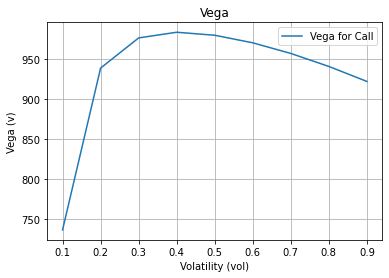

In [95]:
fig = plt.figure()
plt.plot(vol, Vega, '-')
plt.grid()
plt.xlabel('Volatility (vol)')
plt.ylabel('Vega (v)')
plt.title('Vega')
plt.legend(['Vega for Call'])

In [96]:
v = vega(2675.3, 2500, 1, 0.0134, 0, 0.2475, 'call')
print('v = $', v.round(3))

v = $ 963.773


In [97]:
vc1 = vega(2675.3, 2500, 1, 0.0134, 0, 0.2475, 'call') * 0.1
print('If the v increases by 10%, then the value of the option increases by $',vc1.round(3))

If the v increases by 10%, then the value of the option increases by $ 96.377


In [98]:
S = np.linspace(1000, 4000, 51)
T = np.linspace(0.5, 2, 51)
Vega = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Vega[i,j] = vega(S[j], 2500, T[i], 0.0134, 0, 0.2475, 'call')

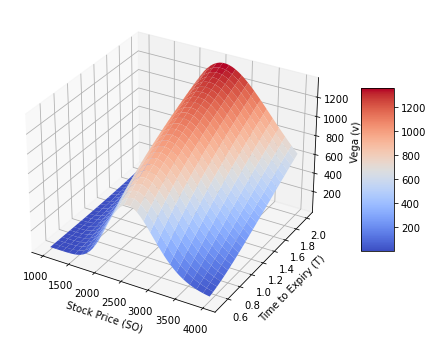

In [99]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Vega, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price (SO)')
ax.set_ylabel('Time to Expiry (T)')
ax.set_zlabel('Vega (v)')
fig.colorbar(surf, shrink=0.5, aspect=5);



## Rho

In [100]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [101]:
RC = rho(2675.3, 2500, 1, 0.0134, 0, 0.2475, 'call')
print('\u03C1 = $',RC.round(2))

ρ = $ 1432.94


In [102]:
r = np.linspace(0,0.1,11)
Rho_Call = np.zeros((len(r),1))
Rho_Put = np.zeros((len(r),1))
for i in range(len(r)):
    Rho_Call [i] = rho(2675.3, 2500, 1, r[i], 0, 0.2475, 'call')

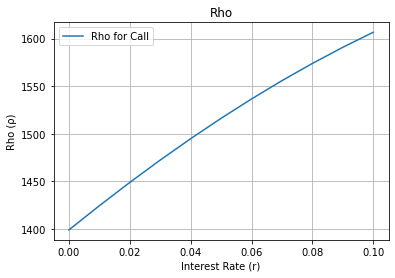

In [103]:
fig = plt.figure()
plt.plot(r, Rho_Call, '-')
plt.grid()
plt.xlabel('Interest Rate (r)')
plt.ylabel('Rho (\u03C1)')
plt.title('Rho')
plt.legend(['Rho for Call'])

The option value when the interest rate is 0.1%

In [104]:
RC = rho(2675.3, 2500, 1, 0.0134, 0, 0.2475, 'call') * 0.001
print('\u03C1 = $',RC.round(5))

ρ = $ 1.43294


In [105]:
S = np.linspace(1000, 4000, 404)
T = np.linspace(0.5, 2, 51)
Rho = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Rho[i,j] = rho(S[j], 2500, T[i], 0.0134, 0, 0.2475, 'call')

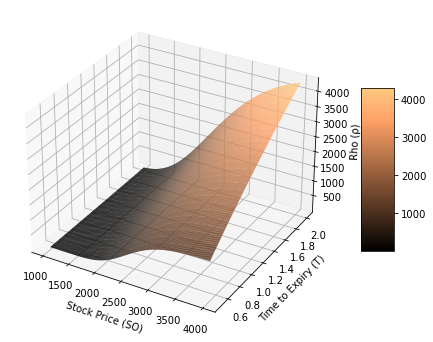

In [106]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Rho, rstride=2, cstride=2, cmap=plt.cm.copper, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price (SO)')
ax.set_ylabel('Time to Expiry (T)')
ax.set_zlabel('Rho (\u03C1)')
fig.colorbar(surf, shrink=0.5, aspect=5);